![banner](../banner.jpg)

***Training course in data analysis for genomic surveillance of African malaria vectors***

---

# Population structure in _Anopheles funestus_

**Theme: Analysis**

**DISCLAIMER: This is work in progress and subject to change and updates.**

A certain degree of familiarity with the content of the training course on _Anopheles gambiae s.l._ is expected. Many of the concepts presented in this module were introduced in the training course and we will refer to the relevant workshop and module instead of giving detailed explanations.

More specifically, this module will use neighbour-joining trees and principal component analyses, which were introduced in [Workshop 3 - Module 4](https://anopheles-genomic-surveillance.github.io/workshop-3/module-4-NJT.html) and will be covered in more details in a future advanced module, to observe population structure. In order to observe diversity within cohorts, we will also use the statistics and measures of the homozigosity of a sample introduced in [Workshop 5](https://anopheles-genomic-surveillance.github.io/workshop-5/about.html). Users are encouraged to go back to these workshops to refamiliarize themselves with their content.

## Learning objectives

After completing this module, you will be able to use the `malariagen_data` Python package to:

* Create neighbour-joining trees to detect population structure
* Use a Principal Component Analysis to study population structure
* Compute diversity statistics to infer population demographics

## Lecture?

### English

### Français

Please note that the code in the cells below might differ from that shown in the video. This can happen because Python packages and their dependencies change due to updates, necessitating tweaks to the code.

## Setup
First, let's install the python packages we will need for our analyses.

In [ ]:
%pip install -q --no-warn-conflicts malariagen_data

Now we've installed `malariagen_data`, we can import it into our environment and set it up to access data in the cloud.

Note that authentication is required to access data through the package, please follow the instructions [here](https://malariagen.github.io/vector-data/vobs/vobs-data-access.html).

In [1]:
import malariagen_data
import numpy as np
import pandas as pd
import seaborn as sns
import os
import plotly.io as pio
pio.renderers.default = "notebook+colab"

To avoid having to rerun these analyses, we’ll save the results so we can come back to them later. In Google Colab, you can save results to your Google Drive, which will mean you don’t lose results even if you leave the notebook and come back several days later.

When mounting your Google Drive, you will need to follow the authorization instructions.

With our Google Drive now mounted, we can define and make a directory where we want to save our results.

In [2]:
try:
    # if running on colab, mount Google Drive
    from google.colab import drive
    drive.mount('drive')
except ImportError:
    pass

In [3]:
results_dir = "drive/MyDrive/Colab Data/af1-structure-results"
os.makedirs(results_dir, exist_ok=True)

In [6]:
af1 = malariagen_data.Af1(results_cache=results_dir)
af1

<MalariaGEN Af1 API client>
Storage URL             : gs://vo_afun_release_master_us_central1
Data releases available : 1.0, 1.1, 1.2, 1.3, 1.4
Results cache           : /home/jonbrenas/anopheles-genomic-surveillance.github.io/docs/advanced-training-materials/drive/MyDrive/Colab Data/af1-structure-results
Cohorts analysis        : 20240515
Site filters analysis   : dt_20200416
Software version        : malariagen_data 15.2.0
Client location         : Iowa, United States (Google Cloud us-central1)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact support@malariagen.net. For API documentation see 
https://malariagen.github.io/malariagen-data-python/v15.2.0/Af1.html

## Continent-wide population structure

The _An. gambiae_ data resource `Ag3` contains several different taxa and it is an obvious source of structure within the resource. We can start by checking if the same is true of `Af1`.

In [7]:
af1.sample_metadata(sample_sets="1.0").groupby('taxon').size()

taxon
funestus    656
dtype: int64

Despite the fact that _An. funestus_ is a complex of species, all samples available in `Af1.0` are considered to belong to same taxon. We can thus assume for the rest of this notebook that the population structure we observe doesn't rise to differences in terms of taxon classification. This may not, and indeed does not, mean that it will be true of future additions to the resource and we will have to be aware of that if additional data is used in the future.

We will now generate a neighbour-joining tree (as we did during [Workshop 3](https://anopheles-genomic-surveillance.github.io/workshop-3/about.html)) to study the population structure using all the data available. We will use a region of chromosome 2 which is free from inversions and known signals of selection. 

In [8]:
region = "2RL:60,000,000-100,000,000"
n_snps = 100_000

In [9]:
af1.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_sets = "1.0",
    color="country",
)

Because samples from many different countries are available in `Af1`, this njt is a little tricky to analyse. The most obvious conclusion is that basic geography seems to explain the majority of the structure we observe, i.e., samples from the same country to tend to group together and away from samples from other locations. 

There are, however, a few exceptions and we are going to look more closely at some of them. We can see, in the top-left, a cluster containing samples from Malawi, Zambia, Tanzania and Mozambique that are quite well mixed. These countries are not very distant from each other but, looking at the map from [Advanced Funestus - Exploration](https://anopheles-genomic-surveillance.github.io/advanced-training-materials/funestus_exploration.html), we can see that the locations are still quite distant from each other.

We see another two well-mixed clusters, top-right and bottom-right, of samples from Kenya, Uganda and the Democratic Republic. On the map, these sampling sites are much closer to each other. The top-right cluster also gradually extends to the Central African Republic and then Cameroon which makes a lot of sense geographically.  

In addition to the samples from Kenya and Uganda, we can see that the samples from DRC are split into another homogeneous cluster. The same is true for the samples from Mozambique. Finally the samples from Ghana are split into two clusters, one of which also includes the samples from Nigeria. Interestingly, the samples from Benin, which are between Nigeria and Ghana geographically, form their own cluster.

We will now look at some of these countries in isolation, starting with Mozambique.

In [10]:
af1.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_query = "country == 'Mozambique'",
    sample_sets = "1.0",
    color="admin1_name",
)

The structure in Mozambique is clearly defined by geography. Let's now look at Ghana.

In [11]:
af1.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_query = "country == 'Ghana'",
    sample_sets = "1.0",
    color="admin1_name",
)

We can see that, apart from the sample **VBS24205**, the region of origin of the samples determines in which cluster they fall. The Northern cluster is less homogeneous than the Southern one.

Next, let's look at the DRC.

In [12]:
af1.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_query = "country == 'Democratic Republic of the Congo'",
    sample_sets = "1.0",
    color="admin1_name",
)

There is again a clear geographic explanation for the population structure. Now that we know which samples to exclude, let's look at Uganda, Kenya, the DRC, the Central African Republic and Cameroon together.

In [13]:
af1.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_query = "country in ['Kenya', 'Uganda', 'Central African Republic', 'Cameroon', 'Democratic Republic of the Congo'] and admin1_name != 'Kinshasa'",
    sample_sets = "1.0",
    color="country",
)

This time, the situation is a little less clear cut. The samples from the Central African Republic and Cameroon are not mixed and slightly more distant from the rest, as we observed previously, and the Kenyan samples are generally to the right but the samples from Uganda and the DRC and sprinkled among the big cluster fairly regularly. There seems to be very little population structure between these samples.

Let's look at a PCA with these same samples.

In [14]:
pca_df, evr = af1.pca(
    region=region, 
    n_snps=n_snps, 
    sample_query = "country in ['Kenya', 'Uganda', 'Central African Republic', 'Cameroon', 'Democratic Republic of the Congo'] and admin1_name != 'Kinshasa'",
    sample_sets = "1.0",
)
af1.plot_pca_coords(pca_df, color="country")

This plot shows a very similar result to what was observed using the neighbour-joining tree: samples from Kenya, Uganda and the DRC form one fairly homogeneous cluster while samples from the Central African Republic and Cameroon are a little different. PC2 blows up the Cameroonian cluster, we can check using the explained variance that it is not meaningful.

In [15]:
af1.plot_pca_variance(evr)

As expected, the explained variance is generally low and only PC1 is really above the plateau of values.

## Genetic diversity

So far, we have looked at which populations look markedly different from their neighbours. We will now try to look at the genetic diversity within some of these populations and try to see if the differences we observed affect their diversities and their demographics. A more detailed explanation of the code used and how to interpret genetic diversity analyses can be found in [Workshop 5](https://anopheles-genomic-surveillance.github.io/workshop-5/about.html).

We will look at the populations from Mozambique, Ghana and the DRC as our exemplar cohorts.

In [14]:
df_stats_admin1_year= af1.diversity_stats(
    sample_query="release == '1.0' and country in ['Democratic Republic of the Congo', 'Ghana', 'Mozambique']",
    cohorts="admin1_year",
    cohort_size=10,
    region=region,
    site_mask="funestus",
    site_class="CDS_DEG_4",
)
df_stats_admin1_year

cohort  theta_pi  theta_pi_estimate  theta_pi_bias  \
0  CD-HU_fune_2017  0.030781           0.030781   4.514322e-07   
1  CD-KN_fune_2015  0.031232           0.031233  -9.453471e-07   
2  GH-AH_fune_2014  0.030609           0.030608   6.031017e-07   
3  GH-NP_fune_2017  0.027089           0.027088   1.218321e-06   
4   MZ-L_fune_2016  0.025648           0.025648   1.730250e-07   
5   MZ-L_fune_2018  0.026050           0.026049   1.041284e-06   
6   MZ-P_fune_2015  0.025382           0.025381   1.147190e-06   

   theta_pi_std_err  theta_pi_ci_err  theta_pi_ci_low  theta_pi_ci_upp  \
0          0.000605         0.002370         0.029596         0.031966   
1          0.000536         0.002101         0.030183         0.032283   
2          0.000611         0.002395         0.029411         0.031806   
3          0.000613         0.002402         0.025887         0.028289   
4          0.000533         0.002088         0.024604         0.026692   
5          0.000540         0.002117         0.024991         0.027108   
6          0.000510         0.001999         0.024382         0.026381   

    theta_w  theta_w_estimate  ...  tajima_d_ci_upp     taxon  year  \
0  0.045245          0.045242  ...        -1.314886  funestus  2017   
1  0.040638          0.040639  ...        -0.927535  funestus  2015   
2  0.044442          0.044439  ...        -1.279664  funestus  2014   
3  0.030716          0.030710  ...        -0.447752  funestus  2017   
4  0.025341          0.025342  ...         0.097808  funestus  2016   
5  0.026161          0.026162  ...         0.025088  funestus  2018   
6  0.025676          0.025676  ...         0.000476  funestus  2015   

           month                           country  admin1_iso  \
0             10  Democratic Republic of the Congo       CD-HU   
1              5  Democratic Republic of the Congo       CD-KN   
2              3                             Ghana       GH-AH   
3  [6, 7, 8, 10]                             Ghana       GH-NP   
4              4                        Mozambique        MZ-L   
5         [1, 2]                        Mozambique        MZ-L   
6              8                        Mozambique        MZ-P   

       admin1_name                 admin2_name  longitude   latitude  
0       Upper Uele                       Watsa  29.548000   3.094000  
1         Kinshasa                    Kinshasa  15.313000  -4.327000  
2   Ashanti Region             Adansi Akrofuom  -1.617000   5.933000  
3  Northern Region  [Kumbungu, Tolon, Zabzugu]  -0.968556   9.461972  
4           Maputo                     Manhiça  32.873000 -25.255000  
5           Maputo                     Manhiça  32.877000 -25.265000  
6     Cabo Delgado                       Palma  40.594000 -10.851000  

[7 rows x 31 columns]

In [15]:
import plotly.express as px
def plot_diversity_stats(
    df_stats,
    color=None,
    height=450,
    template="plotly_white"
):

    # set up common plotting parameters
    hover_name = "cohort"
    hover_data = [
        "taxon",
        "country",
        "admin1_iso",
        "admin1_name",
        "admin2_name",
        "year",
        "month",
    ]
    labels = {
        'theta_pi_estimate': r'$\widehat{\theta}_{\pi}$',
        'theta_w_estimate': r'$\widehat{\theta}_{w}$',
        'tajima_d_estimate': r'$D$',
        'cohort': "Cohort",
        'taxon': 'Taxon',
        'country': "Country",
    }
    category_orders = {
        "taxon": ["gambiae", "coluzzii", "funestus"],
    }
    width = 300 + 30 * len(df_stats)

    # nucleotide diversity bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="theta_pi_estimate",
        error_y="theta_pi_ci_err",
        title="Nucleotide diversity",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
    )
    fig.show()

    # watterson estimator bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="theta_w_estimate",
        error_y="theta_w_ci_err",
        title="Watterson estimator",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

    # tajima's d bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="tajima_d_estimate",
        error_y="tajima_d_ci_err",
        title="Tajima's D",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

    # scatter plot comparing diversity estimators
    fig = px.scatter(
        data_frame=df_stats,
        x="theta_pi_estimate",
        y="theta_w_estimate",
        error_x="theta_pi_ci_err",
        error_y="theta_w_ci_err",
        title="Diversity estimators",
        color=color,
        width=500,
        height=500,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

In [16]:
plot_diversity_stats(df_stats_admin1_year, color="country")

We can see clear differences in terms of diversity statistics between the various populations. All populations from Mozambique seem to have similar demographics, and maybe losing diversity. On the other hand, the diversity statistics look very different in the DRC and even more in Ghana between the two different populations.

Let's use the _An. gambiae_ data as a comparison. It doesn't contain any data from Mozambique so we will only use the data from the DRC and Ghana.

In [17]:
ag3 = malariagen_data.Ag3()
df_stats_admin1_year_gam = ag3.diversity_stats(
    sample_query="release == '3.0' and country in ['Democratic Republic of the Congo', 'Ghana']",
    cohorts="admin1_year",
    cohort_size=10,
    region="3L:15,000,000-41,000,000",
    site_mask="gamb_colu_arab",
    site_class="CDS_DEG_4",
)
df_stats_all = pd.concat([df_stats_admin1_year, df_stats_admin1_year_gam])
plot_diversity_stats(df_stats_all, color="taxon")

Cohort (GH-EP_colu_2012) has insufficient samples (1) for requested cohort size (10), dropping.
Access SNP calls: ⠦ (0:00:42.61) 

Locate CDS_DEG_4 sites:   0%|          | 0/159 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/760 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/757 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/757 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/757 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/757 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/757 [00:00<?, ?it/s]

We can see that genetic diversity is much more variable in _An. funestus_ than it is in _An. gambiae_. While some population seem to have similar values of $\theta_w$ (i.e., similar number of segregating sites), $\theta_\pi$ seems generally higher (i.e., more different alleles).

We can also look at the heterozygosity and the runs of homozygosity for some samples from these populations. We will look at **VBS24539** from Northern Mozambique and **VBS24195** from Northern Ghana.

In [18]:
af1.plot_heterozygosity(
    sample="VBS24539",
    region="3RL",
    site_mask="funestus",
    window_size=10_000,
);

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Load genome features: ⠹ (0:00:00.16) 

/home/conda/developer/35674e27b19f7c625ba32a1b88449ff45c90b40edb90a065b66c5a9a5388f41c-20250421-195247-360829-93-training-nb-maintenance-mgen-15.2.0/lib/python3.11/site-packages/malariagen_data/anopheles.py:327: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



In [19]:
af1.plot_heterozygosity(
    sample="VBS24195",
    region="3RL",
    site_mask="funestus",
    window_size=10_000,
);

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Load genome features: ⠙ (0:00:00.08) 

/home/conda/developer/35674e27b19f7c625ba32a1b88449ff45c90b40edb90a065b66c5a9a5388f41c-20250421-195247-360829-93-training-nb-maintenance-mgen-15.2.0/lib/python3.11/site-packages/malariagen_data/anopheles.py:327: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



It looks like there are several regions with very low heterozygosity in the genome of **VBS24195**. We can look at the runs of homozygosity to confirm that.

In [20]:
af1.plot_roh(
    sample="VBS24539",
    region="3RL",
    site_mask="funestus",
    window_size=10_000,
);

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

/home/conda/developer/35674e27b19f7c625ba32a1b88449ff45c90b40edb90a065b66c5a9a5388f41c-20250421-195247-360829-93-training-nb-maintenance-mgen-15.2.0/lib/python3.11/site-packages/malariagen_data/anopheles.py:327: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



In [21]:
af1.plot_roh(
    sample="VBS24195",
    region="3RL",
    site_mask="funestus",
    window_size=10_000,
);

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Load genome features: ⠙ (0:00:00.09) 

/home/conda/developer/35674e27b19f7c625ba32a1b88449ff45c90b40edb90a065b66c5a9a5388f41c-20250421-195247-360829-93-training-nb-maintenance-mgen-15.2.0/lib/python3.11/site-packages/malariagen_data/anopheles.py:327: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



**VBS24195** has, indeed, several much longer runs of homozygosity compared to **VBS24539**. One possible explanation is the presence of genes under selection in these regions, for example genes connected to insecticide resistance. Insecticide resistance will be analysed more thoroughly in [Advanced Funestus - Insecticide resistance](https://anopheles-genomic-surveillance.github.io/advanced-training-materials/funestus_IR.html).

Using only a few samples is unlikely to give us a very representative picture of the situation so let's use a more systematic approach. Beware, the following code may be very slow. We will only use 10 samples per cohort to make it slightly faster.

In [22]:
cohorts = {'Mozambique_north': "release == '1.0' and location == 'Motinho'",
           'Mozambique_south': "release == '1.0' and location in ['Palmeira', 'Palmeiras']",
           'Ghana_north': "release == '1.0' and admin1_name == 'Northern Region'",
           'Ghana_south': "release == '1.0' and location == 'Obuasi'"}

In [23]:
roh_count_list = []
froh_list = []
coh_list = []
sample_list = []

In [24]:
for coh_name, coh_query in cohorts.items():
    for sample in list(af1.sample_metadata().query(coh_query).sample_id)[:10]:
        roh_df = af1.roh_hmm(
            sample=sample,
            region="3RL",
            site_mask="funestus",
            window_size=10_000,
        )
        roh_df_100kb = roh_df.query("roh_length > 100_000")
        roh_count = len(roh_df_100kb)
        roh_total_length = roh_df_100kb["roh_length"].sum()
        froh = roh_total_length / len(af1.genome_sequence(region="3RL"))
        coh_list.append(coh_name)
        sample_list.append(sample)
        roh_count_list.append(roh_count)
        froh_list.append(froh)
df_roh = pd.DataFrame.from_dict({'sample_id': sample_list, 'cohort': coh_list, 'roh_count': roh_count_list, 'froh': froh_list})
df_roh

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

Compute heterozygous genotypes:   0%|          | 0/566 [00:00<?, ?it/s]

sample_id            cohort  roh_count      froh
0   VBS24488  Mozambique_north          2  0.007288
1   VBS24489  Mozambique_north          2  0.006575
2   VBS24492  Mozambique_north          3  0.006747
3   VBS24493  Mozambique_north          1  0.003411
4   VBS24494  Mozambique_north          6  0.016241
5   VBS24497  Mozambique_north          3  0.009385
6   VBS24498  Mozambique_north          1  0.006982
7   VBS24499  Mozambique_north          2  0.007248
8   VBS24502  Mozambique_north          4  0.009050
9   VBS24505  Mozambique_north          3  0.008507
10  VBS17342  Mozambique_south          3  0.008484
11  VBS17345  Mozambique_south          7  0.014227
12  VBS17346  Mozambique_south          8  0.020137
13  VBS17347  Mozambique_south          2  0.005868
14  VBS17348  Mozambique_south          3  0.008000
15  VBS17349  Mozambique_south          3  0.008604
16  VBS17351  Mozambique_south          3  0.004690
17  VBS17353  Mozambique_south          1  0.004507
18  VBS17355  Mozambique_south          9  0.019035
19  VBS17356  Mozambique_south          3  0.006053
20  VBS24195       Ghana_north         47  0.148934
21  VBS24196       Ghana_north         52  0.166943
22  VBS24197       Ghana_north         47  0.126020
23  VBS24198       Ghana_north         43  0.152637
24  VBS24199       Ghana_north         39  0.131004
25  VBS24200       Ghana_north         48  0.205518
26  VBS24201       Ghana_north         44  0.221557
27  VBS24202       Ghana_north         40  0.417817
28  VBS24203       Ghana_north         50  0.200660
29  VBS24204       Ghana_north         36  0.247439
30  VBS17240       Ghana_south          3  0.006122
31  VBS17241       Ghana_south          3  0.007113
32  VBS17242       Ghana_south          1  0.005406
33  VBS17243       Ghana_south          4  0.008991
34  VBS17244       Ghana_south          2  0.005089
35  VBS17245       Ghana_south          3  0.006106
36  VBS17246       Ghana_south          3  0.007483
37  VBS17247       Ghana_south          1  0.003411
38  VBS17248       Ghana_south          3  0.007649
39  VBS17249       Ghana_south          2  0.006407

<Axes: xlabel='froh', ylabel='roh_count'>

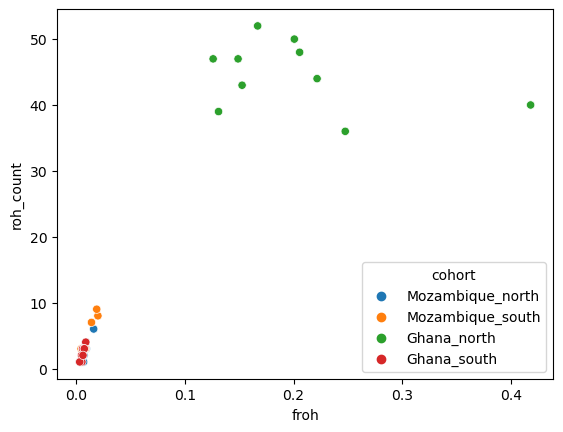

In [25]:
sns.scatterplot(data=df_roh, x="froh", y="roh_count", hue="cohort")

We can see that the population from Northern Ghana is quite atypical with very high numbers and frequencies of runs of homozygosity. 

**Congratulations on reaching the end of this notebook. You should now be able to start analysing Anopheles funestus data using Af1.0.**